<a href="https://colab.research.google.com/github/Shyam3624/PAI-LAB/blob/main/IMLipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
# Load the dataset
df = pd.read_csv('/content/archive.zip')

# Display the first few rows of the dataset
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [7]:
# Check for missing values
print(df.isnull().sum())

# Replace missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Replace missing values for categorical columns with the most frequent value
# Check if there are any categorical columns first
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:  # Proceed only if there are categorical columns
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = imputer.fit_transform(df[categorical_cols])
else:
    print("No categorical columns found in the DataFrame.")

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
No categorical columns found in the DataFrame.


In [8]:
# Remove duplicate rows
df = df.drop_duplicates()


In [9]:
# Example: Detecting outliers in the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
median_age = df['Age'].median()
df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound), 'Age'] = median_age


In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Apply Label Encoding to the Ethnicity and ParentalEducation columns
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['ParentalEducation'] = label_encoder.fit_transform(df['ParentalEducation'])

print(df[['Ethnicity', 'ParentalEducation']].head())


   Ethnicity  ParentalEducation
0          0                  2
1          0                  1
2          2                  3
3          0                  3
4          0                  2


In [14]:
# Apply One-Hot Encoding to the Ethnicity and ParentalEducation columns
df = pd.get_dummies(df, columns=['Ethnicity', 'ParentalEducation'], drop_first=True)

print(df.head())


   StudentID   Age  Gender  StudyTimeWeekly  Absences  Tutoring  \
0     1001.0  17.0     1.0        19.833723       7.0       1.0   
1     1002.0  18.0     0.0        15.408756       0.0       0.0   
2     1003.0  15.0     0.0         4.210570      26.0       0.0   
3     1004.0  17.0     1.0        10.028829      14.0       0.0   
4     1005.0  17.0     1.0         4.672495      17.0       1.0   

   ParentalSupport  Extracurricular  Sports  Music  Volunteering       GPA  \
0              2.0              0.0     0.0    1.0           0.0  2.929196   
1              1.0              0.0     0.0    0.0           0.0  3.042915   
2              2.0              0.0     0.0    0.0           0.0  0.112602   
3              3.0              1.0     0.0    0.0           0.0  2.054218   
4              3.0              0.0     0.0    0.0           0.0  1.288061   

   GradeClass  Ethnicity_1  Ethnicity_2  Ethnicity_3  ParentalEducation_1  \
0         2.0        False        False        Fals

In [18]:
scaler = StandardScaler()
scaled_features = ['GradeClass']  # Replace with your feature names
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('GradeClass', axis=1)  # Features
y = df['GradeClass']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features:\n", X_train)
print("Training target:\n", y_train)
print("Testing features:\n", X_test)
print("Testing target:\n", y_test)

Training features:
       StudentID       Age  Gender  StudyTimeWeekly  Absences  Tutoring  \
642      1643.0  1.362944     1.0        18.118879      24.0       1.0   
1752     2753.0 -0.417106     1.0         2.469271      19.0       0.0   
1401     2402.0  0.472919     0.0         3.456401      25.0       0.0   
2032     3033.0  0.472919     1.0        15.838131      25.0       1.0   
990      1991.0 -0.417106     0.0         1.045373      19.0       1.0   
...         ...       ...     ...              ...       ...       ...   
1638     2639.0 -1.307132     0.0        13.092424      13.0       1.0   
1095     2096.0 -0.417106     0.0         2.159249      19.0       0.0   
1130     2131.0 -0.417106     1.0         3.572578      14.0       1.0   
1294     2295.0  1.362944     0.0         4.402585      20.0       0.0   
860      1861.0  1.362944     0.0         5.427628      27.0       0.0   

      ParentalSupport  Extracurricular  Sports  Music  Volunteering       GPA  \
642       

In [21]:
df.to_csv('preprocessed_dataset.csv', index=False)

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

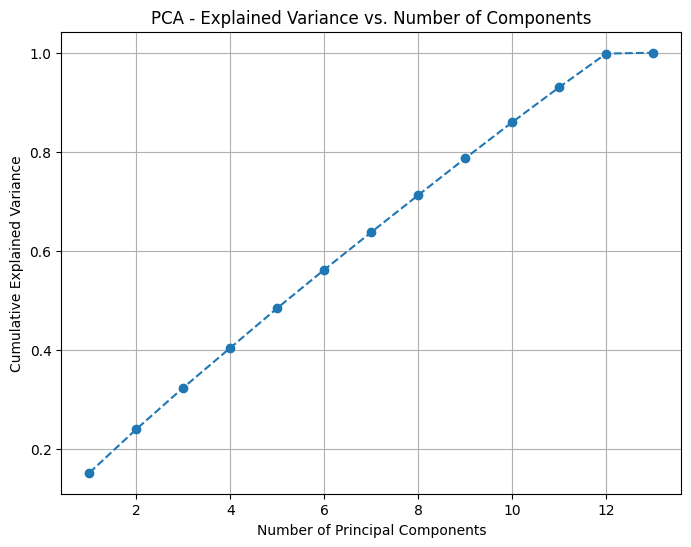

Transformed Training Data:
 [[-1.07907245  0.42800948]
 [-1.66784145 -1.37505896]
 [-2.77305218 -0.17862269]
 ...
 [ 0.15821305  1.24478939]
 [-0.97808034 -0.70438647]
 [-2.7127334  -0.66022993]]
Transformed Testing Data:
 [[-7.88736307e-01 -1.32367284e+00]
 [ 1.49229560e+00 -1.76969724e+00]
 [ 1.14714078e-01 -1.74008603e-02]
 [ 2.49448712e+00 -1.18978950e+00]
 [-2.54658625e+00  6.34113161e-01]
 [ 1.15832635e+00  3.34189558e-01]
 [-2.62197047e-01  1.01416443e+00]
 [ 6.45332411e-01  1.33736694e+00]
 [ 4.85672680e-01  1.53791324e+00]
 [-1.45377067e+00 -1.33376052e+00]
 [ 8.11977564e-01 -9.62538176e-01]
 [-1.90087885e+00  1.10307480e+00]
 [ 1.73753096e+00  1.06568991e+00]
 [ 1.15166168e+00 -1.48535329e+00]
 [ 1.47284387e+00  8.15094714e-01]
 [-2.60344058e+00  3.62653512e-01]
 [-1.15549932e+00 -1.66191412e-01]
 [-5.11752477e-01  5.89980153e-01]
 [ 2.06814047e-01 -3.47893828e-02]
 [ 9.67944218e-01  1.63913759e+00]
 [ 1.35039684e-01  8.38156513e-01]
 [-5.20476579e-01 -9.40400369e-01]
 [-2.55

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/archive.zip'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Drop non-numeric columns if necessary (e.g., identifiers)
if 'StudentID' in df.columns:
    df = df.drop('StudentID', axis=1)

# Define features and target variable
X = df.drop('GradeClass', axis=1)  # Features
y = df['GradeClass']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print explained variance ratio and cumulative explained variance
print("Explained Variance Ratio for each Principal Component:\n", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:\n", cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Choose number of components based on cumulative explained variance
n_components = 2  # Example: choose 2 components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Transformed Training Data:\n", X_train_pca)
print("Transformed Testing Data:\n", X_test_pca)


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

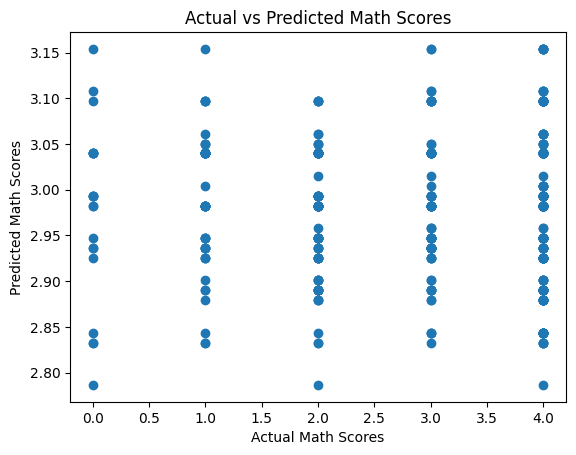

Coefficients: [-0.04631256  0.05713703]
Intercept: 2.925512028187495


In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
file_path = r"/content/archive.zip"  # Replace with the correct path to your dataset
df = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(df.head())
print(df.isnull().sum())
X = df[['Ethnicity', 'ParentalEducation']]  # Features
y = df['GradeClass']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.show()
# Optional: Display the coefficients of the linear regression model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')